In [1]:
1+1

2

In [2]:
#Loading the rpy2 extension enables cell magic to be used
#This runs R code in jupyter notebook cells
%load_ext rpy2.ipython

In [67]:
%%R
library(Seurat)
library(dplyr)
library(SingleR)
library(celldex)
library(BiocParallel)
library(pheatmap)
library(data.table)
library(ggplot2)
library(biomaRt)
library(Seurat)
library(dplyr)
library(SingleR)
library(celldex)
library(BiocParallel)
library(pheatmap)
library(data.table)
library(ggplot2)
library(SingleCellExperiment)
library(biomaRt)
library(viridis)
library(enrichR)
library(decoupleR)
library(OmnipathR)
library(stringr)
library(SCpubr)
library(ComplexHeatmap)
library(CellChat)

In [58]:
%%R
filename <- paste0("10x_tupro/out_benchmark/data/rds/MACEGEJ-2-r12.rds") #paste0("out/data/rds/", sample, ".rds")
scDataOld <- readRDS(filename)

In [59]:
%%R
clusters <- read.csv("10x_tupro/out_benchmark/MAHEFOG-r1_MAHEFOG-r2_test_MANOFYB-r1_MANOFYB-r2_MACEGEJ-r1_MACEGEJ-r2_MAJOFIJ-2-r1_MAJOFIJ-2-r2_MELIPIT-r1_MELIPIT-r2_MAKIGIW-r1_MAKIGIW-r2_MIDEKOG-r1_MIDEKOG-r2_MACEGEJ-2-r1_MACEGEJ-2-r12_MAJOFIJ-r1_MAJOFIJ-r2/AESTETIK_evaluate/clusters/model-MACEGEJ-2-r12-best_param.csv")
clusters <- data.frame(clusters)
rownames(clusters) <- clusters$spot_barcode
# ADD CLUSTERS
scDataOld$AESTETIK_cluster <- clusters[colnames(scDataOld), ]$best_param

In [60]:
%%R
loadGenes <- function(genes){
    out <- tryCatch({
        mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
        G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id","hgnc_symbol"),values=genes, mart= mart)
        G_list <- G_list[G_list$ensembl_gene_id != "" & G_list$hgnc_symbol != "", ]
        G_list <- G_list[!duplicated(G_list$ensembl_gene_id), ]
        G_list <- G_list[!duplicated(G_list$hgnc_symbol), ]
        return(G_list)
    },error=function(cond) {
            print(cond)
            return(data.frame())
        }
        )
    return(out)
}
genes <- rownames(scDataOld)
G_list <- loadGenes(genes)
rownames(G_list) <- G_list$ensembl_gene_id

In [7]:
%%R
scDataOld <- scDataOld[rownames(scDataOld) %in% G_list$ensembl_gene_id]
rownames(G_list) <- G_list$ensembl_gene_id
counts <- GetAssayData(scDataOld, "counts")
rownames(counts) <- G_list[rownames(counts), ]$hgnc_symbol

In [8]:
%%R
scData <- CreateSeuratObject(counts=counts, meta.data = scDataOld@meta.data)
#scData$AE_cluster <- clusters[colnames(scData), ]$best_param
#scData$ground_truth <- clusters[colnames(scData), ]$ground_truth
Idents(scData) <- scData$AESTETIK_cluster

In [9]:
%%R
scData <- NormalizeData(scData, normalization.method = "LogNormalize", scale.factor = 10000, verbose = FALSE)
scData <- FindVariableFeatures(scData, selection.method = "vst", verbose = FALSE, nfeatures = 3000)
scData <- ScaleData(scData, vars.to.regress = NULL, verbose = FALSE, do.scale = FALSE, features = rownames(scData))
dim(scData)

[1] 17864  4557


In [10]:
%%R
scData$AESTETIK_cluster <- scData$AESTETIK_cluster + 1
Idents(scData) <- scData$AESTETIK_cluster
markers <- FindAllMarkers(object = scData, test.use = "wilcox", only.pos = TRUE)
## Significant markers
markers <- markers[, c("gene", "cluster", "pct.1", "pct.2", "avg_log2FC", "p_val_adj")]
markers <- markers[markers$p_val_adj < 0.05, ]
markers$cluster <- as.factor(markers$cluster)
markers$diff_pct <- abs(markers$pct.1 - markers$pct.2)
markers <- markers[order(markers$diff_pct, decreasing = TRUE), ]

R[write to console]: Calculating cluster 2



  |                                                  | 0 % ~calculating   |+                                                 | 2 % ~02s           |++                                                | 3 % ~02s           |+++                                               | 5 % ~02s           |++++                                              | 6 % ~02s           |++++                                              | 8 % ~02s           |+++++                                             | 9 % ~02s           |++++++                                            | 11% ~02s           |+++++++                                           | 12% ~02s           |+++++++                                           | 14% ~02s           |++++++++                                          | 15% ~02s           |+++++++++                                         | 17% ~02s           |++++++++++                                        | 18% ~02s           |++++++++++                                        | 20% ~02s 

R[write to console]: Calculating cluster 1



  |                                                  | 0 % ~calculating   |++                                                | 2 % ~01s           |+++                                               | 4 % ~01s           |++++                                              | 6 % ~01s           |+++++                                             | 9 % ~01s           |++++++                                            | 11% ~01s           |+++++++                                           | 13% ~01s           |++++++++                                          | 15% ~01s           |+++++++++                                         | 17% ~01s           |++++++++++                                        | 19% ~01s           |+++++++++++                                       | 21% ~01s           |++++++++++++                                      | 23% ~01s           |+++++++++++++                                     | 26% ~01s           |++++++++++++++                                    | 28% ~01s 

R[write to console]: Calculating cluster 3



  |                                                  | 0 % ~calculating   |+                                                 | 2 % ~02s           |++                                                | 3 % ~02s           |+++                                               | 5 % ~02s           |++++                                              | 6 % ~02s           |++++                                              | 8 % ~02s           |+++++                                             | 9 % ~02s           |++++++                                            | 11% ~02s           |+++++++                                           | 12% ~02s           |++++++++                                          | 14% ~02s           |++++++++                                          | 16% ~02s           |+++++++++                                         | 17% ~02s           |++++++++++                                        | 19% ~02s           |+++++++++++                                       | 20% ~02s 

R[write to console]: Calculating cluster 4



  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~02s           |++                                                | 2 % ~02s           |++                                                | 3 % ~02s           |+++                                               | 4 % ~02s           |+++                                               | 6 % ~02s           |++++                                              | 7 % ~01s           |++++                                              | 8 % ~01s           |+++++                                             | 9 % ~01s           |+++++                                             | 10% ~01s           |++++++                                            | 11% ~01s           |+++++++                                           | 12% ~01s           |+++++++                                           | 13% ~01s           |++++++++                                          | 14% ~01s 

In [ ]:
%%R -w 6 -h 10 -u in
topN <- markers %>% group_by(cluster)
topN <- slice_max(topN, n = 15, order_by = avg_log2FC)
genesToPlot <- unique(as.character(topN$gene))
DoHeatmap(scData, features = genesToPlot) + ggtitle("Top 20 marker genes")

In [ ]:
%%R
topN$cluster

In [ ]:
%%R
topN[topN$cluster == 2, ]$gene

In [ ]:
%%R
library(enrichR)
dbs <- c("Cancer_Cell_Line_Encyclopedia",
         "GO_Cellular_Component_2023",
         "GO_Biological_Process_2023", 
         "GO_Molecular_Function_2023", 
         "Reactome_2022", 
         "ChEA_2022", 
         "GeneSigDB",
         "Human_Phenotype_Ontology")
enriched <- enrichr(topN[topN$cluster == 2, ]$gene, dbs)

In [ ]:
%%R
plotEnrich(enriched[[2]], showTerms = 20, numChar = 40, y = "Count", orderBy = "P.value")

In [ ]:
%%R
Idents(scData) <- colnames(scData)#a$AESTETIK_cluster
data.input = Seurat::GetAssayData(scData, slot = "data") # normalized data matrix
colnames(data.input) <- colnames(data.input)
labels <- paste0("C_", scData$AESTETIK_cluster)
meta = data.frame(labels = labels, slices = "A1") # manually create a dataframe consisting of the cell labels
rownames(meta) <- colnames(data.input)

# a factor level should be defined for the `meta$labels` and `meta$slices`
meta$labels <- factor(meta$labels, levels = levels(factor(labels)))
meta$slices <- factor(meta$slices, levels = c("A1"))
unique(meta$labels) # check the cell labels

spatial.locs <- data.frame(imagerow=scData@meta.data$spot_X, imagecol=scData@meta.data$spot_Y)
rownames(spatial.locs) <- colnames(data.input)

scalefactors = jsonlite::fromJSON(txt = file.path("10x_tupro/out_benchmark/data/meta/MACEGEJ-r1.json"))
spot.size = 65 # the theoretical spot size (um) in 10X Visium
conversion.factor = spot.size/scalefactors$spot_diameter_fullres
spatial.factors = data.frame(ratio = conversion.factor, tol = spot.size/2)

In [ ]:
%%R
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "labels",
                           datatype = "spatial", coordinates = spatial.locs, spatial.factors = spatial.factors)

In [ ]:
%%R
CellChatDB <- CellChatDB.human

# use a subset of CellChatDB for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling", key = "annotation") # use Secreted Signaling

# set the used database in the object
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database


In [ ]:
%%R
dim(cellchat@data.signaling)

In [ ]:
%%R
future::plan("multisession", workers = 2) 
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

In [ ]:
%%R
cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1, 
                              distance.use = TRUE, interaction.range = 250, scale.distance = 71,
                              contact.dependent = TRUE, contact.range = 100)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

In [ ]:
%%R
cellchat <- computeCommunProbPathway(cellchat)

In [ ]:
%%R
cellchat <- aggregateNet(cellchat)

In [ ]:
%%R
cellchat <- updateClusterLabels(cellchat, c("C_1", "C_2", "C_3", "C_4"), c(1,2,3,4))

In [ ]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = rowSums(cellchat@net$count), weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = rowSums(cellchat@net$weight), weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

In [ ]:
%%R
netVisual_heatmap(cellchat, measure = "count", color.heatmap = "Blues")

In [ ]:
%%R
netVisual_heatmap(cellchat, measure = "weight", color.heatmap = "Blues")

In [ ]:
%%R
cellchat@netP$pathways
# "MIF"        "SPP1" CXCL PERIOSTIN ANNEXIN

In [ ]:
%%R
pathways.show <- c("PDGF") 
# Circle plot
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")

In [ ]:
%%R
colors <- c("#ff7f0eff", "#1f77b4ff", "#2ca02cff", "#d62728ff")
names(colors) <- levels(cellchat@idents)
# Spatial plot
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, 
                    signaling = ("WNT"),
                    color.use = colors,
                    layout = "chord", edge.width.max = 3,
                    vertex.size.max = 1, 
                    alpha.image = 0.3, 
                    vertex.label.cex = 3)

In [ ]:
%%R
colors <- c("#ff7f0eff", "#1f77b4ff", "#2ca02cff", "#d62728ff")
names(colors) <- levels(cellchat@idents)
# Spatial plot
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, 
                    signaling = ("WNT"),
                    color.use = colors,
                    layout = "spatial", edge.width.max = 3,
                    vertex.size.max = 1, 
                    alpha.image = 0.3, 
                    vertex.label.cex = 5.5)

In [ ]:
%%R
colors <- c("#ff7f0eff", "#1f77b4ff", "#2ca02cff", "#d62728ff")
names(colors) <- levels(cellchat@idents)
# Spatial plot
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, 
                    signaling = ("MIF"),
                    color.use = colors,
                    layout = "chord", edge.width.max = 3,
                    vertex.size.max = 1, 
                    alpha.image = 0.3, 
                    vertex.label.cex = 5.5)

In [ ]:
%%R
# {'2': '#1f77b4ff', '1': '#ff7f0eff', '3': '#2ca02cff', '4': '#d62728ff'}
# Spatial plot
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, 
                    signaling = pathways.show,
                    color.use = c("#ff7f0eff", "#1f77b4ff", "#2ca02cff", "#d62728ff"),
                    layout = "chord", edge.width.max = 3,
                    vertex.size.max = 1, 
                    alpha.image = 0.3, 
                    vertex.label.cex = 5.5)

In [ ]:
%%R
netAnalysis_contribution(cellchat, signaling = ("WNT"))

In [ ]:
%%R
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
par(mfrow=c(1,1))
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)

In [ ]:
%%R -w 20 -h 8 -u in
# Take an input of a few genes
spatialFeaturePlot(cellchat, features = c("CD74", "CXCR4"), point.size = 5, color.heatmap = "Reds", direction = 1)

In [ ]:
%%R
Idents(scData) <- scData$AESTETIK_cluster
markers <- FindAllMarkers(object = scData, test.use = "wilcox", only.pos = TRUE)
## Significant markers
markers <- markers[, c("gene", "cluster", "pct.1", "pct.2", "avg_log2FC", "p_val_adj")]
markers <- markers[markers$p_val_adj < 0.05, ]
markers$cluster <- as.factor(markers$cluster)
markers$diff_pct <- abs(markers$pct.1 - markers$pct.2)
markers <- markers[order(markers$diff_pct, decreasing = TRUE), ]

topN <- markers %>% group_by(cluster)
topN <- slice_max(topN, n = 10, order_by = avg_log2FC)
genesToPlot <- unique(as.character(topN$gene))
DoHeatmap(scData, features = genesToPlot) + ggtitle("Top 15 marker genes")

In [11]:
%%R
computeTFActivityAnalysis <- function(cells, species){
  species <- tolower(species)
  # Retrieve prior knowledge network.
  network <- decoupleR::get_dorothea(organism = species,
                                     levels = c("A", "B", "C", "D"))
  
  # Run weighted means algorithm.
  activities <- decoupleR::run_wmean(mat = as.matrix(sample@assays[[assay]]@data),
                                   network = network,
                                   .source = "source",
                                   .targe = "target",
                                   .mor = "mor",
                                   times = 100,
                                   minsize = 5)
  
  return(activities)
}


computePathwayActivityAnalysis <- function(cells, species){
  species <- tolower(species)
  # Retrieve prior knowledge network.
  network <- decoupleR::get_progeny(organism = species)
  
  # Run weighted means algorithm.
  activities <- decoupleR::run_wmean(mat = as.matrix(GetAssayData(cells)),
                                     network = network,
                                     .source = "source",
                                     .targe = "target",
                                     .mor = "weight",
                                     times = 100,
                                     minsize = 5)
  
  return(activities)
}

In [44]:
%%R
group = data.table(scData@meta.data[, c("ground_truth", "AESTETIK_cluster")])[, .N, by=c("AESTETIK_cluster", "ground_truth")]
group = group[order(group$AESTETIK_cluster, -group$N)]
group

    AESTETIK_cluster           ground_truth    N
 1:                1 Normal lymphoid tissue  444
 2:                1                 Stroma  347
 3:                1                  Tumor  238
 4:                1     Blood and necrosis   14
 5:                2                  Tumor 2211
 6:                2 Normal lymphoid tissue   11
 7:                2                 Stroma    4
 8:                2     Blood and necrosis    1
 9:                3     Blood and necrosis  447
10:                3                  Tumor  216
11:                3                 Stroma  114
12:                3 Normal lymphoid tissue   83
13:                4                 Stroma  407
14:                4     Blood and necrosis   14
15:                4                  Tumor    4
16:                4 Normal lymphoid tissue    2


In [47]:
%%R
mapping_func = c(1,4,2,3)
names(mapping_func) <- c(1,2,3,4)
group$new_cluster = mapping_func[group$AESTETIK_cluster]
group

    AESTETIK_cluster           ground_truth    N new_cluster
 1:                1 Normal lymphoid tissue  444           1
 2:                1                 Stroma  347           1
 3:                1                  Tumor  238           1
 4:                1     Blood and necrosis   14           1
 5:                2                  Tumor 2211           4
 6:                2 Normal lymphoid tissue   11           4
 7:                2                 Stroma    4           4
 8:                2     Blood and necrosis    1           4
 9:                3     Blood and necrosis  447           2
10:                3                  Tumor  216           2
11:                3                 Stroma  114           2
12:                3 Normal lymphoid tissue   83           2
13:                4                 Stroma  407           3
14:                4     Blood and necrosis   14           3
15:                4                  Tumor    4           3
16:                4 Nor

In [54]:
%%R
scData[, Idents(scData) != 2] # remove blood

An object of class Seurat 
17864 features across 3697 samples within 1 assay 
Active assay: RNA (17864 features, 3000 variable features)


In [55]:
%%R
species <- "human"
Idents(scData) <- mapping_func[scData$AESTETIK_cluster]
pathwayActivity <- computePathwayActivityAnalysis(cells = scData, species = species)
#TFActivity <- computeTFActivityAnalysis(cells = scData, species = species)

R[write to console]: [2024-01-22 12:52:50] [SUCCESS] [OmnipathR] Loaded 700239 annotation records from cache.
R[write to console]: 



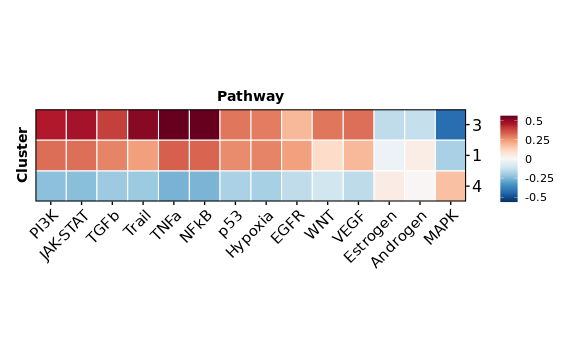

In [57]:
%%R -w 8 -h 5 -u in
g <- SCpubr::do_PathwayActivityPlot(sample = scData, return_object = T,
                               activities = pathwayActivity, legend.position = "right", legend.type="normal")

g1 <- g$Heatmap + theme(legend.title= element_blank(), 
                        axis.text.x = element_text(size = 15),
                        axis.text.y = element_text(size = 16)) + ylab("Cluster")
g1
#ggsave("test.png", g1, dpi=300)

In [ ]:
%%R

In [15]:
%%R
Idents(scData) <- scData$AESTETIK_cluster + 1
Idents(scData)[1:3]

AAACAACGAATAGTTC AAACAAGTATCTCCCA AAACAATCTACTAGCA 
               2                1                2 
Levels: 2 1 3 4
